In [20]:
# !set AZURE_STORAGE_CONNECTION_STRING="DefaultEndpointsProtocol=https;AccountName=wnsmlopstrgci;AccountKey=4z0qFA8WnrzQsgnFdB4ZOREsUqgZj1m4bhZD/+ILiPNxFAKMF8e0jZyhbL6vBOc4GLSiOb8OQ7c++ASteGzcNw==;EndpointSuffix=core.windows.net"

# !set AZURE_STORAGE_ACCESS_KEY="4z0qFA8WnrzQsgnFdB4ZOREsUqgZj1m4bhZD/+ILiPNxFAKMF8e0jZyhbL6vBOc4GLSiOb8OQ7c++ASteGzcNw=="

# !set MLFLOW_SERVER_DEFAULT_ARTIFACT_ROOT="wasbs://artifacts@wnsmlopstrgci.blob.core.windows.net

#!setx AZURE_STORAGE_CONNECTION_STRING "DefaultEndpointsProtocol=https;AccountName=wnsmlopstrgci;AccountKey=4z0qFA8WnrzQsgnFdB4ZOREsUqgZj1m4bhZD/+ILiPNxFAKMF8e0jZyhbL6vBOc4GLSiOb8OQ7c++ASteGzcNw==;EndpointSuffix=core.windows.net"


In [5]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import logging

In [6]:
mlflow.set_tracking_uri("http://10.31.8.38:5000")
mlflow.set_experiment("experiment-demo-priyank")

<Experiment: artifact_location='wasbs://artifacts@wnsmlopstrgci.blob.core.windows.net/17', experiment_id='17', lifecycle_stage='active', name='experiment-demo-priyank', tags={}>

In [7]:
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


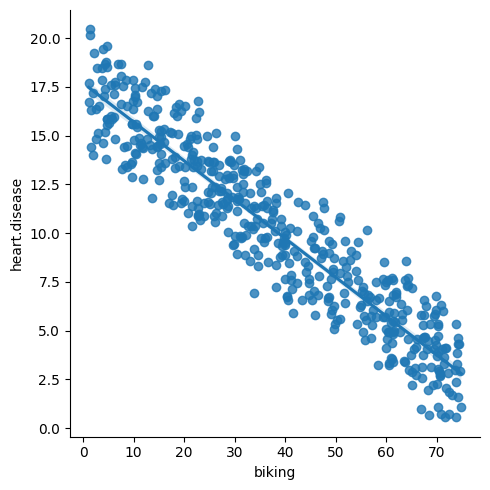

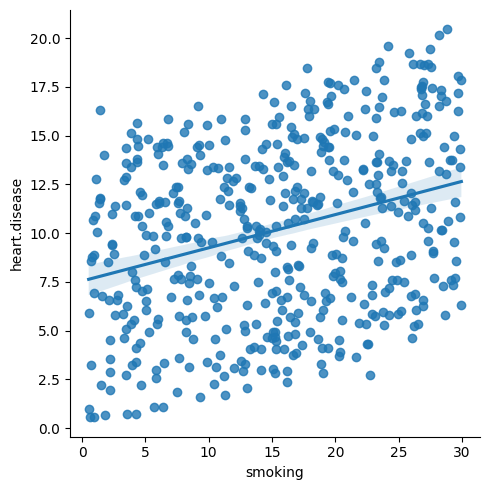

In [8]:
# https://youtu.be/bluclMxiUkA
"""
Multiple Linear Regression uses several explanatory variables to predict the outcome of a response variable.
There are a lot of variables and multiple linear regression is designed to create a model 
based on all these variables. 

#Dataset link:
https://cdn.scribbr.com/wp-content/uploads//2020/02/heart.data_.zip?_ga=2.217642335.893016210.1598387608-409916526.1598387608

#Heart disease
The effect that the independent variables biking and smoking 
have on the dependent variable heart disease 

the percentage of people biking to work each day, the percentage of people smoking, 
and the percentage of people with heart disease in an imaginary sample of 500 towns.


"""

# import pandas as pd
# import seaborn as sns
# import numpy as np
# import pickle

df = pd.read_csv('heart_data.csv')
print(df.head())

df = df.drop("Unnamed: 0", axis=1)
#A few plots in Seaborn to understand the data

sns.lmplot(x='biking', y='heart.disease', data=df)  
sns.lmplot(x='smoking', y='heart.disease', data=df)  


x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

#pickle X_ train for ALE
#save lode X_train
filename = 'X_train.pickle'
pickle.dump(X_train, open(filename, 'wb'))



# from sklearn import linear_model

# #Create Linear Regression object
# model = linear_model.LinearRegression()

# #Now let us call fit method to train the model using independent variables.
# #And the value that needs to be predicted (Images_Analyzed)

# model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
# print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well


# prediction_test = model.predict(X_test)    
# print(y_test, prediction_test)
# print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

# import pickle
# pickle.dump(model, open('model.pkl','wb'))

# model = pickle.load(open('model.pkl','rb'))
# print(model.predict([[20.1, 56.3]]))


#Model is ready. Let us check the coefficients, stored as reg.coef_.
#These are a, b, and c from our equation. 
#Intercept is stored as reg.intercept_
#print(model.coef_, model.intercept_)

#All set to predict the number of images someone would analyze at a given time
#print(model.predict([[13, 2, 23]]))


In [9]:
# dataset = pd.read_csv('hiring.csv')

# dataset['experience'].fillna(0, inplace=True)

# dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

# X = dataset.iloc[:, :3]


In [10]:
# dataset.head()

In [11]:
# def convert_to_int(word):
#     word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
#                 'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
#     return word_dict[word]

In [12]:
# X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))

# y = dataset.iloc[:, -1]

In [13]:
#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
with mlflow.start_run():
    regressor = LinearRegression()

#Fitting model with trainig data
    regressor.fit(X_train, y_train)

# Saving model to disk
    pickle.dump(regressor, open('model.pkl','wb'))

# Loading model to compare the results
    model = pickle.load(open('model.pkl','rb'))
    print(model.predict([[20.1, 56.3]]))
    
    prediction_test = model.predict(X_test)    
    print(y_test, prediction_test)
    print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        #Model registry does not work with file store
    if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(regressor, "model", registered_model_name="Linear-Regression")
    else:
        mlflow.sklearn.log_model(regressor, "model")

C:\Users\u393845\venv_xai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[20.94129617]
487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6.6791

C:\Users\u393845\venv_xai\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'Linear-Regression' already exists. Creating a new version of this model...
2022/07/11 15:19:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Linear-Regression, version 14
Created version '14' of model 'Linear-Regression'.


In [14]:
#!mlflow ui

In [ ]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

try:
    print("Azure Blob Storage v" + __version__ + " - Python quickstart sample")

    # Quick start code goes here

except Exception as ex:
    print('Exception:')
    print(ex)

In [ ]:
#!setx AZURE_STORAGE_CONNECTION_STRING "DefaultEndpointsProtocol=https;AccountName=wnsmlopstrgci;AccountKey=4z0qFA8WnrzQsgnFdB4ZOREsUqgZj1m4bhZD/+ILiPNxFAKMF8e0jZyhbL6vBOc4GLSiOb8OQ7c++ASteGzcNw==;EndpointSuffix=core.windows.net"


In [ ]:
# Retrieve the connection string for use with the application. The storage
# connection string is stored in an environment variable on the machine
# running the application called AZURE_STORAGE_CONNECTION_STRING. If the environment variable is
# created after the application is launched in a console or with Visual Studio,
# the shell or application needs to be closed and reloaded to take the
# environment variable into account.
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')

In [ ]:
connect_str

In [ ]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

# Create a unique name for the container
container_name = str(uuid.uuid4())

# Create the container
container_client = blob_service_client.create_container(container_name)

In [13]:
# Create a local directory to hold blob data
local_path = "./data"
os.mkdir(local_path)

# Create a file in the local data directory to upload and download
local_file_name = str(uuid.uuid4()) + ".txt"
upload_file_path = os.path.join(local_path, local_file_name)

# Write text to the file
file = open(upload_file_path, 'w')
file.write("Hello, World!")
file.close()

# Create a blob client using the local file name as the name for the blob
blob_client = blob_service_client.get_blob_client(container=container_name, blob=local_file_name)

print("\nUploading to Azure Storage as blob:\n\t" + local_file_name)

# Upload the created file
with open(upload_file_path, "rb") as data:
    blob_client.upload_blob(data)

NameError: name 'blob_service_client' is not defined

In [ ]:
print("\nListing blobs...")

# List the blobs in the container
blob_list = container_client.list_blobs()
for blob in blob_list:
    print("\t" + blob.name)